In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
df = pd.read_excel('Hotel-A-train.xlsx')

In [239]:
df.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,M,40,Latino,High-School,<25K,North,City Hotel,2015-07-01,2015-07-02,...,BB,No,No,No Deposit,Online,Yes,check-out,Yes,0,106.440241
1,77491756,F,49,African American,High-School,50K -- 100K,East,Airport Hotels,2015-07-01,2015-07-02,...,BB,No,No,Non-Refundable,Online,Yes,check-out,No,0,158.039564
2,73747291,F,42,caucasian,College,<25K,East,Airport Hotels,2015-07-02,2015-07-06,...,BB,No,No,Refundable,Online,Yes,check-out,No,0,212.610780
3,67301739,M,25,Latino,High-School,>100K,South,City Hotel,2015-07-02,2015-07-03,...,BB,No,No,No Deposit,Agent,Yes,check-out,Yes,5,106.146407
4,77222321,F,62,African American,Grad,25K --50K,East,Airport Hotels,2015-07-03,2015-07-04,...,BB,No,No,Refundable,Direct,No,check-out,Yes,10,159.384439


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27499 entries, 0 to 27498
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Reservation-id          27499 non-null  int64         
 1   Gender                  27499 non-null  object        
 2   Age                     27499 non-null  int64         
 3   Ethnicity               27499 non-null  object        
 4   Educational_Level       27499 non-null  object        
 5   Income                  27499 non-null  object        
 6   Country_region          27499 non-null  object        
 7   Hotel_Type              27499 non-null  object        
 8   Expected_checkin        27499 non-null  datetime64[ns]
 9   Expected_checkout       27499 non-null  datetime64[ns]
 10  Booking_date            27499 non-null  datetime64[ns]
 11  Adults                  27499 non-null  int64         
 12  Children                27499 non-null  int64 

In [241]:
print(df.columns.tolist())

['Reservation-id', 'Gender', 'Age', 'Ethnicity', 'Educational_Level', 'Income', 'Country_region', 'Hotel_Type', 'Expected_checkin', 'Expected_checkout', 'Booking_date', 'Adults', 'Children', 'Babies', 'Meal_Type', 'Visted_Previously', 'Previous_Cancellations', 'Deposit_type', 'Booking_channel', 'Required_Car_Parking', 'Reservation_Status', 'Use_Promotion', 'Discount_Rate', 'Room_Rate']


In [242]:
print(df.isnull().sum())

Reservation-id               0
Gender                       0
Age                          0
Ethnicity                    0
Educational_Level            0
Income                       0
Country_region               0
Hotel_Type                   0
Expected_checkin             0
Expected_checkout            0
Booking_date                 0
Adults                       0
Children                     0
Babies                    4755
Meal_Type                    0
Visted_Previously            0
Previous_Cancellations       0
Deposit_type                 0
Booking_channel              0
Required_Car_Parking         0
Reservation_Status           0
Use_Promotion                0
Discount_Rate                0
Room_Rate                    0
dtype: int64


In [243]:
df['Babies'] = df['Babies'].fillna(0)

In [244]:
df.dtypes

,0
Reservation-id,int64
Gender,object
Age,int64
Ethnicity,object
Educational_Level,object
Income,object
Country_region,object
Hotel_Type,object
Expected_checkin,datetime64[ns]
Expected_checkout,datetime64[ns]


In [245]:
df['Babies'] = df['Babies'].astype(int)

In [246]:
df.dtypes

,0
Reservation-id,int64
Gender,object
Age,int64
Ethnicity,object
Educational_Level,object
Income,object
Country_region,object
Hotel_Type,object
Expected_checkin,datetime64[ns]
Expected_checkout,datetime64[ns]


In [247]:
df['stay_days'] = (df['Expected_checkout'] - df['Expected_checkin']).dt.days

In [248]:
df['booking_lead'] = (df['Expected_checkin'] - df['Booking_date']).dt.days

In [249]:
frequency_table = df['stay_days'].value_counts().sort_index()
frequency_table


,count
stay_days,
1,13671
2,6956
3,4577
4,2295


In [250]:
negative_booking_lead = df[df['booking_lead'] < 0]['booking_lead']
frequency_table_negative = negative_booking_lead.value_counts().sort_index()
frequency_table_negative


,count
booking_lead,
-4,23
-3,77
-2,132
-1,274


In [251]:
df = df[df['booking_lead'] >= 0]

In [252]:
df['booking_lead'] = df['booking_lead'].astype(int)

<ipython-input-252-0a7c17ccee0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['booking_lead'] = df['booking_lead'].astype(int)


In [253]:
df

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,stay_days,booking_lead
0,39428300,M,40,Latino,High-School,<25K,North,City Hotel,2015-07-01,2015-07-02,...,No,No Deposit,Online,Yes,check-out,Yes,0,106.440241,1,41
1,77491756,F,49,African American,High-School,50K -- 100K,East,Airport Hotels,2015-07-01,2015-07-02,...,No,Non-Refundable,Online,Yes,check-out,No,0,158.039564,1,36
2,73747291,F,42,caucasian,College,<25K,East,Airport Hotels,2015-07-02,2015-07-06,...,No,Refundable,Online,Yes,check-out,No,0,212.610780,4,3
3,67301739,M,25,Latino,High-School,>100K,South,City Hotel,2015-07-02,2015-07-03,...,No,No Deposit,Agent,Yes,check-out,Yes,5,106.146407,1,12
4,77222321,F,62,African American,Grad,25K --50K,East,Airport Hotels,2015-07-03,2015-07-04,...,No,Refundable,Direct,No,check-out,Yes,10,159.384439,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,M,49,Latino,High-School,<25K,West,City Hotel,2016-08-31,2016-09-01,...,Yes,No Deposit,Online,Yes,check-out,Yes,0,104.594251,1,37
27495,56414525,M,49,Latino,College,25K --50K,South,City Hotel,2016-08-31,2016-09-01,...,No,No Deposit,Agent,Yes,no-show,No,5,109.027432,1,127
27496,52023375,F,49,Asian American,College,50K -- 100K,South,Resort,2016-09-01,2016-09-02,...,No,Non-Refundable,Direct,Yes,check-out,Yes,10,202.000000,1,9
27497,98041387,M,65,Latino,College,25K --50K,South,City Hotel,2016-08-31,2016-09-01,...,No,No Deposit,Online,No,canceled,No,10,137.428075,1,98


In [254]:
df.describe().loc[['count', 'mean', 'min', 'std'], ['Age', 'Room_Rate']]


,Age,Room_Rate
count,26993.000000,26993.000000
mean,44.006742,155.676284
min,18.000000,100.000000
std,15.310304,38.353012


In [255]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['Gender'].unique())

print("Categories in 'Ethnicity' variable:  ",end=" ")
print(df['Ethnicity'].unique())

print("Categories in'Educational_Level' variable:",end=" " )
print(df['Educational_Level'].unique())

print("Categories in 'Income' variable:     ",end=" " )
print(df['Income'].unique())

print("Categories in 'Country_region' variable:     ",end=" " )
print(df['Country_region'].unique())

print("Categories in 'Hotel_Type' variable:     ",end=" " )
print(df['Hotel_Type'].unique())

print("Categories in 'Meal_Type' variable:  ",end=" ")
print(df['Meal_Type'].unique())

print("Categories in'Deposit_type' variable:",end=" " )
print(df['Deposit_type'].unique())

print("Categories in 'Booking_channel' variable:     ",end=" " )
print(df['Booking_channel'].unique())

print("Categories in 'Discount_Rate' variable:     ",end=" " )
print(df['Discount_Rate'].unique())

Categories in 'gender' variable:      ['M' 'F']
Categories in 'Ethnicity' variable:   ['Latino' 'African American' 'caucasian' 'Asian American']
Categories in'Educational_Level' variable: ['High-School' 'College' 'Grad' 'Mid-School']
Categories in 'Income' variable:      ['<25K' '50K -- 100K' '>100K' '25K --50K']
Categories in 'Country_region' variable:      ['North' 'East' 'South' 'West']
Categories in 'Hotel_Type' variable:      ['City Hotel' 'Airport Hotels' 'Resort']
Categories in 'Meal_Type' variable:   ['BB' 'FB' 'HB']
Categories in'Deposit_type' variable: ['No Deposit' 'Non-Refundable' 'Refundable']
Categories in 'Booking_channel' variable:      ['Online' 'Agent' 'Direct']
Categories in 'Discount_Rate' variable:      [ 0  5 10 25 20 15 30]


Outliers in 'Age':
Series([], Name: Age, dtype: int64)

Outliers in 'Room_Rate':
Series([], Name: Room_Rate, dtype: float64)


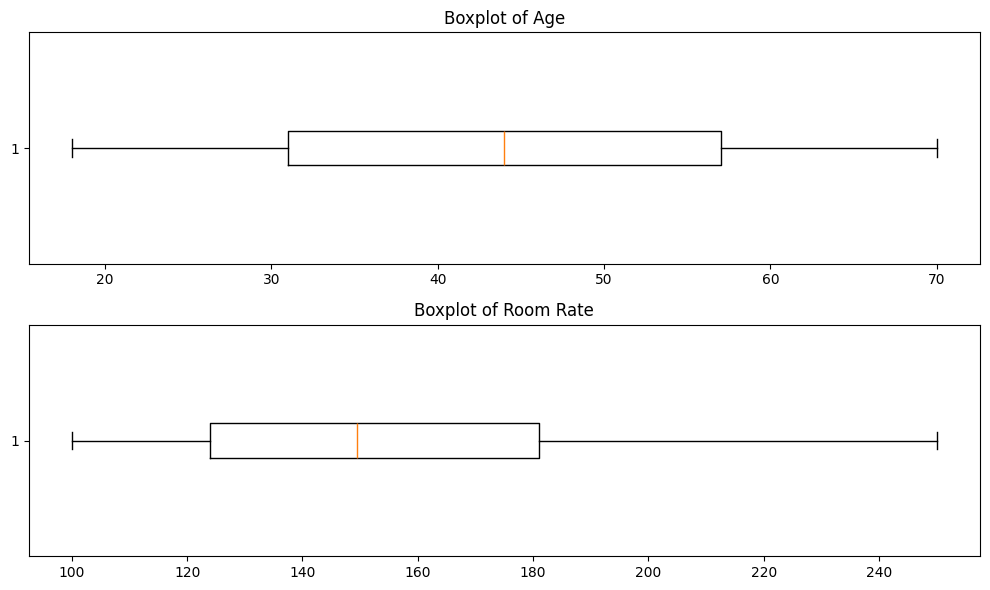

In [256]:

def detect_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers


# Example usage for 'Age' and 'Room_Rate':
age_outliers = detect_outliers_iqr(df['Age'])
room_rate_outliers = detect_outliers_iqr(df['Room_Rate'])


print("Outliers in 'Age':")
print(age_outliers)

print("\nOutliers in 'Room_Rate':")
print(room_rate_outliers)


# Visualization (optional):
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.boxplot(df['Age'], vert=False)
plt.title("Boxplot of Age")

plt.subplot(2, 1, 2)
plt.boxplot(df['Room_Rate'], vert=False)
plt.title("Boxplot of Room Rate")

plt.tight_layout()
plt.show()


In [257]:
df["Total_Guests"] = df["Adults"] + df["Children"] + df["Babies"]

In [258]:
df

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,stay_days,booking_lead,Total_Guests
0,39428300,M,40,Latino,High-School,<25K,North,City Hotel,2015-07-01,2015-07-02,...,No Deposit,Online,Yes,check-out,Yes,0,106.440241,1,41,6
1,77491756,F,49,African American,High-School,50K -- 100K,East,Airport Hotels,2015-07-01,2015-07-02,...,Non-Refundable,Online,Yes,check-out,No,0,158.039564,1,36,4
2,73747291,F,42,caucasian,College,<25K,East,Airport Hotels,2015-07-02,2015-07-06,...,Refundable,Online,Yes,check-out,No,0,212.610780,4,3,4
3,67301739,M,25,Latino,High-School,>100K,South,City Hotel,2015-07-02,2015-07-03,...,No Deposit,Agent,Yes,check-out,Yes,5,106.146407,1,12,6
4,77222321,F,62,African American,Grad,25K --50K,East,Airport Hotels,2015-07-03,2015-07-04,...,Refundable,Direct,No,check-out,Yes,10,159.384439,1,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,M,49,Latino,High-School,<25K,West,City Hotel,2016-08-31,2016-09-01,...,No Deposit,Online,Yes,check-out,Yes,0,104.594251,1,37,3
27495,56414525,M,49,Latino,College,25K --50K,South,City Hotel,2016-08-31,2016-09-01,...,No Deposit,Agent,Yes,no-show,No,5,109.027432,1,127,3
27496,52023375,F,49,Asian American,College,50K -- 100K,South,Resort,2016-09-01,2016-09-02,...,Non-Refundable,Direct,Yes,check-out,Yes,10,202.000000,1,9,2
27497,98041387,M,65,Latino,College,25K --50K,South,City Hotel,2016-08-31,2016-09-01,...,No Deposit,Online,No,canceled,No,10,137.428075,1,98,4


In [259]:
duplicate_reservations = df[df.duplicated(subset=['Reservation-id'], keep=False)]
duplicate_reservations
df.drop_duplicates(subset=['Reservation-id'], inplace=True)

In [260]:
df['Reservation-id'].nunique()

26990

In [261]:
# df.drop(columns=["Reservation-id", "Expected_checkin", "Expected_checkout", "Booking_date"], inplace=True)


In [262]:
df.to_csv("train_cleaned.csv", index=False)

# EDA

## General Exploration

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [264]:
df = pd.read_csv("train_cleaned.csv")

In [265]:
df.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,stay_days,booking_lead,Total_Guests
0,39428300,M,40,Latino,High-School,<25K,North,City Hotel,2015-07-01,2015-07-02,...,No Deposit,Online,Yes,check-out,Yes,0,106.440241,1,41,6
1,77491756,F,49,African American,High-School,50K -- 100K,East,Airport Hotels,2015-07-01,2015-07-02,...,Non-Refundable,Online,Yes,check-out,No,0,158.039564,1,36,4
2,73747291,F,42,caucasian,College,<25K,East,Airport Hotels,2015-07-02,2015-07-06,...,Refundable,Online,Yes,check-out,No,0,212.610780,4,3,4
3,67301739,M,25,Latino,High-School,>100K,South,City Hotel,2015-07-02,2015-07-03,...,No Deposit,Agent,Yes,check-out,Yes,5,106.146407,1,12,6
4,77222321,F,62,African American,Grad,25K --50K,East,Airport Hotels,2015-07-03,2015-07-04,...,Refundable,Direct,No,check-out,Yes,10,159.384439,1,13,2


In [266]:
df.describe(include=[np.number])

,Reservation-id,Age,Adults,Children,Babies,Discount_Rate,Room_Rate,stay_days,booking_lead,Total_Guests
count,2.699000e+04,26990.000000,26990.000000,26990.000000,26990.000000,26990.000000,26990.000000,26990.000000,26990.00000,26990.000000
mean,5.016918e+07,44.009189,2.232234,1.743535,0.309226,8.294554,155.676060,1.828529,112.00100,4.284994
std,2.887992e+07,15.309351,1.180987,0.722559,0.580003,7.842016,38.355014,0.981779,77.25459,1.507006
min,3.154000e+03,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.00000,2.000000
25%,2.524050e+07,31.000000,1.000000,1.000000,0.000000,0.000000,124.000000,1.000000,48.00000,3.000000
50%,5.014261e+07,44.000000,2.000000,2.000000,0.000000,5.000000,149.453653,1.000000,103.00000,4.000000
75%,7.520592e+07,57.000000,3.000000,2.000000,0.000000,10.000000,181.000000,2.000000,167.00000,5.000000
max,9.999900e+07,70.000000,5.000000,3.000000,2.000000,30.000000,250.000000,4.000000,708.00000,10.000000


In [267]:
df.describe(include="object")

,Gender,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,Booking_date,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion
count,26990,26990,26990,26990,26990,26990,26990,26990,26990,26990,26990,26990,26990,26990,26990,26990,26990
unique,2,4,4,4,4,3,900,929,1127,3,2,2,3,3,2,3,2
top,F,Latino,College,50K -- 100K,South,City Hotel,2016-02-09,2016-02-10,2015-10-19,BB,No,No,No Deposit,Online,Yes,check-out,Yes
freq,14649,7755,11696,7791,10729,11494,145,91,231,13806,17999,23927,14507,15290,19261,20775,15876


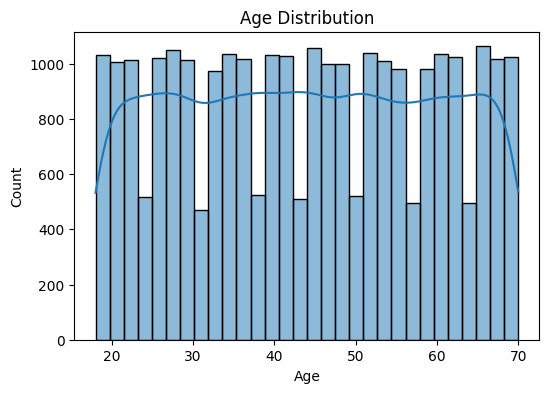

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for Age
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


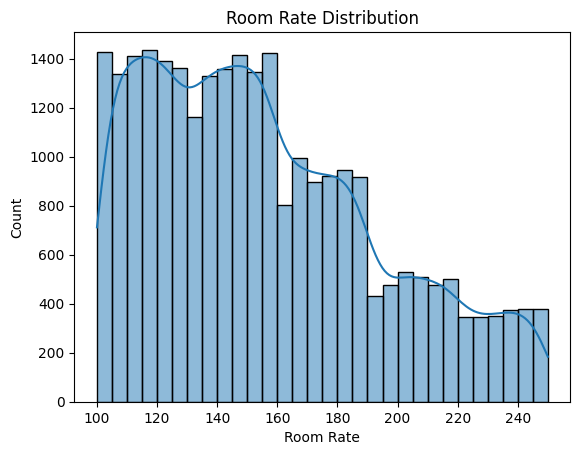

In [269]:
sns.histplot(df['Room_Rate'], bins=30, kde=True)
plt.xlabel('Room Rate')
plt.ylabel('Count')
plt.title('Room Rate Distribution')
plt.show()


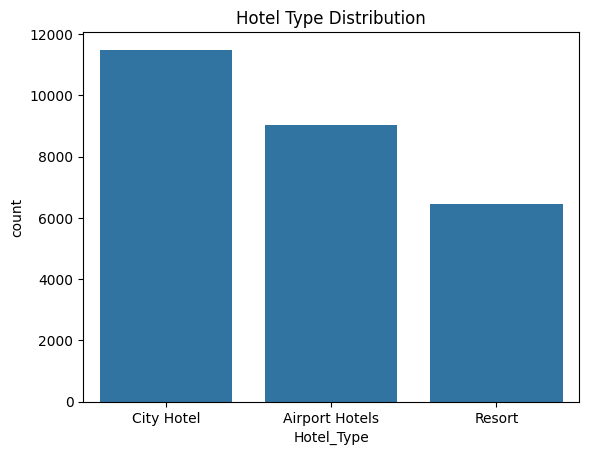

In [270]:
# Bar plot for Hotel Type
sns.countplot(x=df['Hotel_Type'])
plt.title('Hotel Type Distribution')
plt.show()

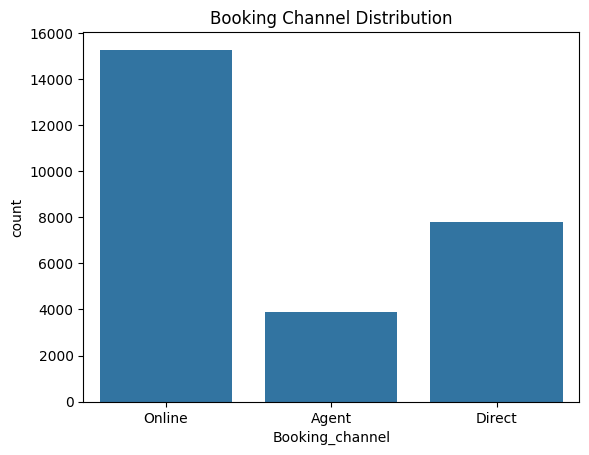

In [271]:
sns.countplot(x=df['Booking_channel'])
plt.title('Booking Channel Distribution')
plt.show()


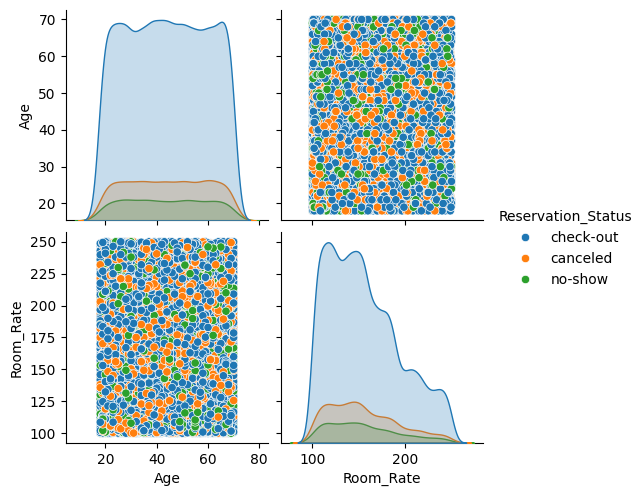

In [272]:
sns.pairplot(df, hue='Reservation_Status', vars=['Age', 'Room_Rate']) # Example, adjust vars as needed
plt.show()

In [273]:
# Calculate correlation on the numeric DataFrame.
correlation_matrix = numeric_df.corr()

# Display the correlation matrix.
correlation_matrix

,Reservation-id,Age,Adults,Children,Babies,Discount_Rate,Room_Rate,stay_days,days_checkin,Total_Guests
Reservation-id,1.000000,0.002022,0.004384,0.006282,-0.009197,-0.000367,-0.008422,-0.004389,0.003765,0.002909
Age,0.002022,1.000000,0.002606,0.004942,-0.295128,0.001191,-0.003639,-0.005368,0.010032,-0.109176
Adults,0.004384,0.002606,1.000000,0.010880,-0.001910,0.080386,0.107548,-0.002643,0.002747,0.788190
Children,0.006282,0.004942,0.010880,1.000000,0.001964,-0.008067,-0.004187,0.008340,-0.009506,0.488784
Babies,-0.009197,-0.295128,-0.001910,0.001964,1.000000,0.000994,0.002277,-0.001460,0.000240,0.384320
Discount_Rate,-0.000367,0.001191,0.080386,-0.008067,0.000994,1.000000,0.735929,-0.002600,-0.000481,0.059514
Room_Rate,-0.008422,-0.003639,0.107548,-0.004187,0.002277,0.735929,1.000000,0.000103,-0.001572,0.083155
stay_days,-0.004389,-0.005368,-0.002643,0.008340,-0.001460,-0.002600,0.000103,1.000000,-0.004475,0.001366
days_checkin,0.003765,0.010032,0.002747,-0.009506,0.000240,-0.000481,-0.001572,-0.004475,1.000000,-0.002313
Total_Guests,0.002909,-0.109176,0.788190,0.488784,0.384320,0.059514,0.083155,0.001366,-0.002313,1.000000


## Booking Cancellations & No-Shows Analysis

<ipython-input-274-c8b220a19c89>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette="pastel")


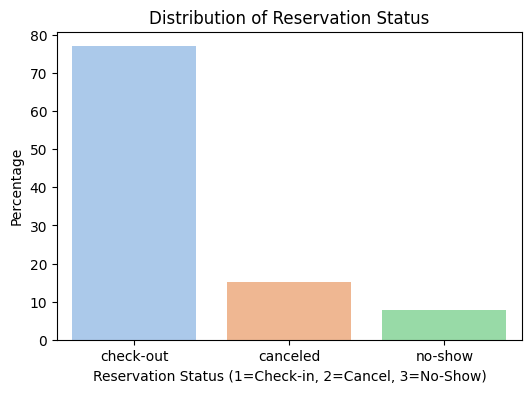

In [274]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of each reservation status
status_counts = df['Reservation_Status'].value_counts(normalize=True) * 100

# Plot the distribution
plt.figure(figsize=(6,4))
sns.barplot(x=status_counts.index, y=status_counts.values, palette="pastel")
plt.xlabel("Reservation Status (1=Check-in, 2=Cancel, 3=No-Show)")
plt.ylabel("Percentage")
plt.title("Distribution of Reservation Status")
plt.show()


In [275]:
import numpy as np
# Calculate summary statistics for numerical columns
numeric_summary = df.describe(include=[np.number])

# Calculate summary statistics for categorical columns
categorical_summary = df.describe(include="object")

print("Summary Statistics for Numerical Columns:\n", numeric_summary)
print("\nSummary Statistics for Categorical Columns:\n", categorical_summary)


Summary Statistics for Numerical Columns:
        Reservation-id           Age        Adults      Children        Babies  \
count    2.699000e+04  26990.000000  26990.000000  26990.000000  26990.000000   
mean     5.016918e+07     44.009189      2.232234      1.743535      0.309226   
std      2.887992e+07     15.309351      1.180987      0.722559      0.580003   
min      3.154000e+03     18.000000      1.000000      1.000000      0.000000   
25%      2.524050e+07     31.000000      1.000000      1.000000      0.000000   
50%      5.014261e+07     44.000000      2.000000      2.000000      0.000000   
75%      7.520592e+07     57.000000      3.000000      2.000000      0.000000   
max      9.999900e+07     70.000000      5.000000      3.000000      2.000000   

       Discount_Rate     Room_Rate     stay_days  booking_lead  Total_Guests  
count   26990.000000  26990.000000  26990.000000   26990.00000  26990.000000  
mean        8.294554    155.676060      1.828529     112.00100      4

<ipython-input-276-5714076b6c63>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette="pastel")


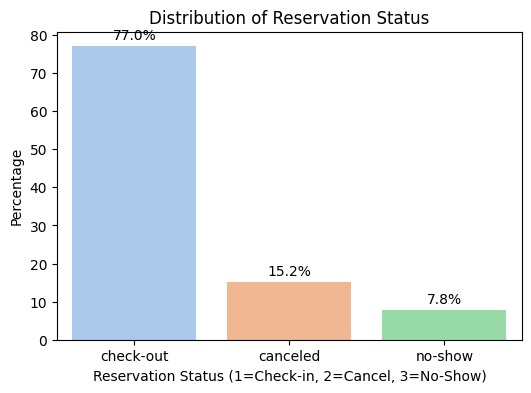

In [276]:
# prompt: instead of this add the percentage values in the chart

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ... (Your existing code)

# ## Booking Cancellations & No-Shows Analysis

# Count the number of each reservation status
status_counts = df['Reservation_Status'].value_counts(normalize=True) * 100

# Plot the distribution
plt.figure(figsize=(6,4))
sns.barplot(x=status_counts.index, y=status_counts.values, palette="pastel")
plt.xlabel("Reservation Status (1=Check-in, 2=Cancel, 3=No-Show)")
plt.ylabel("Percentage")
plt.title("Distribution of Reservation Status")

# Add percentage labels to the bars
for i, v in enumerate(status_counts.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom') # Added percentage labels

plt.show()

# ... (Rest of your code)


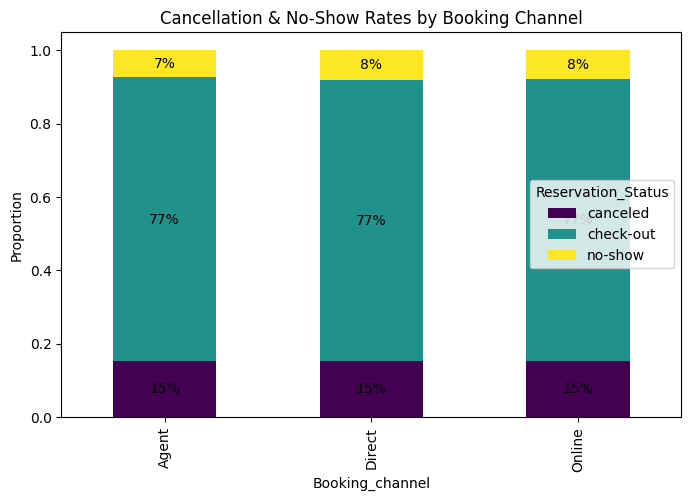

In [277]:
# prompt: instaed of this add the percentage values # Group by Booking Channel and Reservation Status
# booking_cancellation_rates = df.groupby('Booking_channel')['Reservation_Status'].value_counts(normalize=True).unstack()
# # Plot cancellation trends
# booking_cancellation_rates.plot(kind='bar', stacked=True, figsize=(8,5), colormap="viridis")
# plt.ylabel("Proportion")
# plt.title("Cancellation & No-Show Rates by Booking Channel")
# plt.show()

import matplotlib.pyplot as plt
# Group by Booking Channel and Reservation Status
booking_cancellation_rates = df.groupby('Booking_channel')['Reservation_Status'].value_counts(normalize=True).unstack()

# Plot cancellation trends
booking_cancellation_rates.plot(kind='bar', stacked=True, figsize=(8, 5), colormap="viridis")
plt.ylabel("Proportion")
plt.title("Cancellation & No-Show Rates by Booking Channel")

# Add percentage labels to the bars
for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2, y+height/2, f'{height:.0%}', ha='center', va='center')

plt.show()


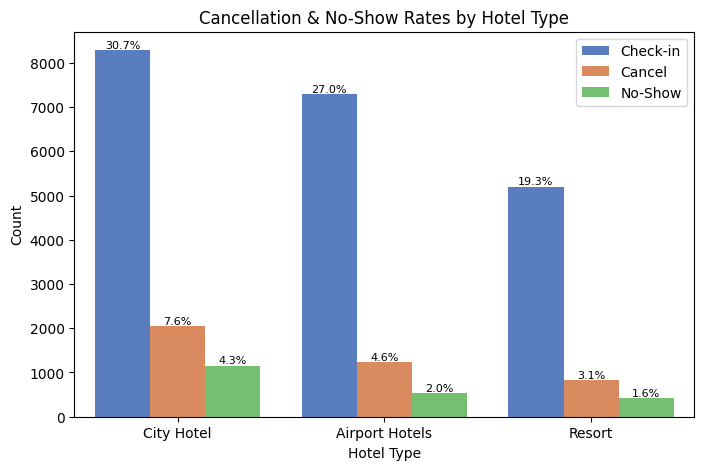

In [278]:

import matplotlib.pyplot as plt
# ... (Your existing code)

# ## Booking Cancellations & No-Shows Analysis

# Count plot of Reservation Status by Hotel Type
plt.figure(figsize=(8,5))
sns.countplot(x='Hotel_Type', hue='Reservation_Status', data=df, palette="muted")
plt.xlabel("Hotel Type")
plt.ylabel("Count")
plt.title("Cancellation & No-Show Rates by Hotel Type")
plt.legend(["Check-in", "Cancel", "No-Show"])

# Annotate the bars with percentages
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Avoid division by zero
        plt.gca().annotate(f'{height/len(df)*100:.1f}%', (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='bottom', fontsize=8)

plt.show()

# ... (Rest of your code)


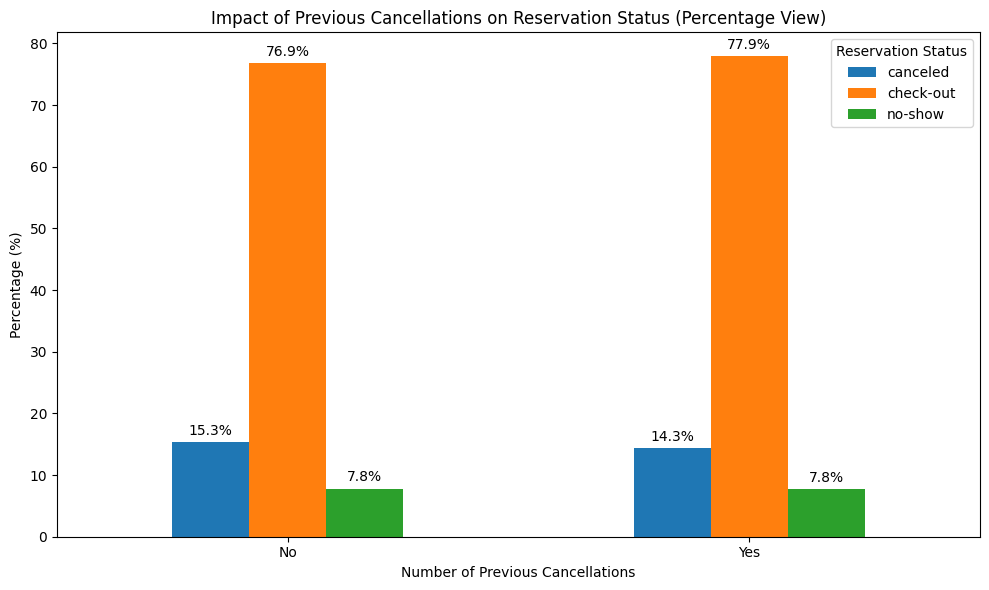

In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group data for the clustered bar chart
cancellation_counts = df.groupby(['Previous_Cancellations', 'Reservation_Status']).size().unstack(fill_value=0)

# Convert counts to percentages
cancellation_percentages = cancellation_counts.div(cancellation_counts.sum(axis=1), axis=0) * 100

# Create the clustered bar chart with percentages
ax = cancellation_percentages.plot(kind='bar', figsize=(10, 6))

# Add percentage values on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

# Formatting the plot
plt.xlabel("Number of Previous Cancellations")
plt.ylabel("Percentage (%)")
plt.title("Impact of Previous Cancellations on Reservation Status (Percentage View)")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title="Reservation Status")
plt.tight_layout()
plt.show()


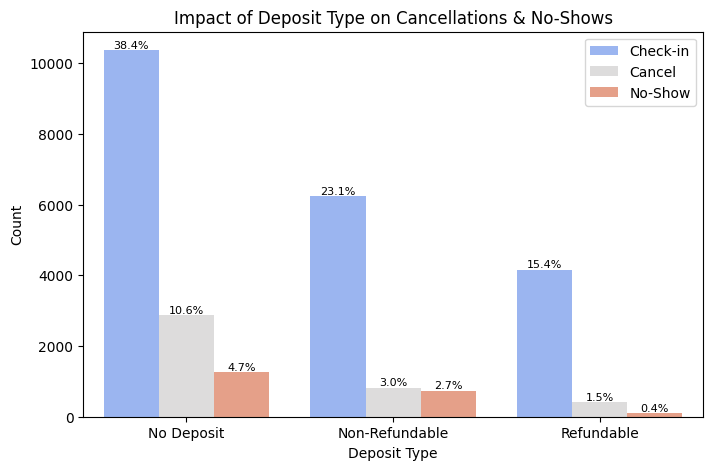

In [284]:


import matplotlib.pyplot as plt
# Count plot of Reservation Status by Deposit Type
plt.figure(figsize=(8,5))
sns.countplot(x='Deposit_type', hue='Reservation_Status', data=df, palette="coolwarm")
plt.xlabel("Deposit Type")
plt.ylabel("Count")
plt.title("Impact of Deposit Type on Cancellations & No-Shows")
plt.legend(["Check-in", "Cancel", "No-Show"])

# Annotate the bars with percentages
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Avoid division by zero
        plt.gca().annotate(f'{height/len(df)*100:.1f}%', (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='bottom', fontsize=8)

plt.show()


In [285]:
# Filter only canceled and no-show reservations
canceled_no_show_df = df[df['Reservation_Status'].isin(['canceled', 'no-show'])]

# Calculate revenue loss
canceled_no_show_df['Revenue_Loss'] = canceled_no_show_df['stay_days'] * canceled_no_show_df['Room_Rate']

# Sum the total revenue loss
total_revenue_loss = canceled_no_show_df['Revenue_Loss'].sum()

print(f"Total Revenue Loss due to Cancellations and No-Shows: ${total_revenue_loss:,.2f}")


Total Revenue Loss due to Cancellations and No-Shows: $1,758,272.18


<ipython-input-285-ce758a8ace61>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canceled_no_show_df['Revenue_Loss'] = canceled_no_show_df['stay_days'] * canceled_no_show_df['Room_Rate']


In [287]:
# Filter canceled and no-show reservations
canceled_df = df[df['Reservation_Status'] == 'canceled']
no_show_df = df[df['Reservation_Status'] == 'no-show']

# Calculate revenue loss
canceled_revenue_loss = (canceled_df['stay_days'] * canceled_df['Room_Rate']).sum()
no_show_revenue_loss = (no_show_df['stay_days'] * no_show_df['Room_Rate']).sum()

# Total revenue loss
total_revenue_loss = canceled_revenue_loss + no_show_revenue_loss

print(f"Revenue Loss due to Cancellations: ${canceled_revenue_loss:,.2f}")
print(f"Revenue Loss due to No-Shows: ${no_show_revenue_loss:,.2f}")
print(f"Total Revenue Loss: ${total_revenue_loss:,.2f}")


Revenue Loss due to Cancellations: $1,165,532.09
Revenue Loss due to No-Shows: $592,740.09
Total Revenue Loss: $1,758,272.18


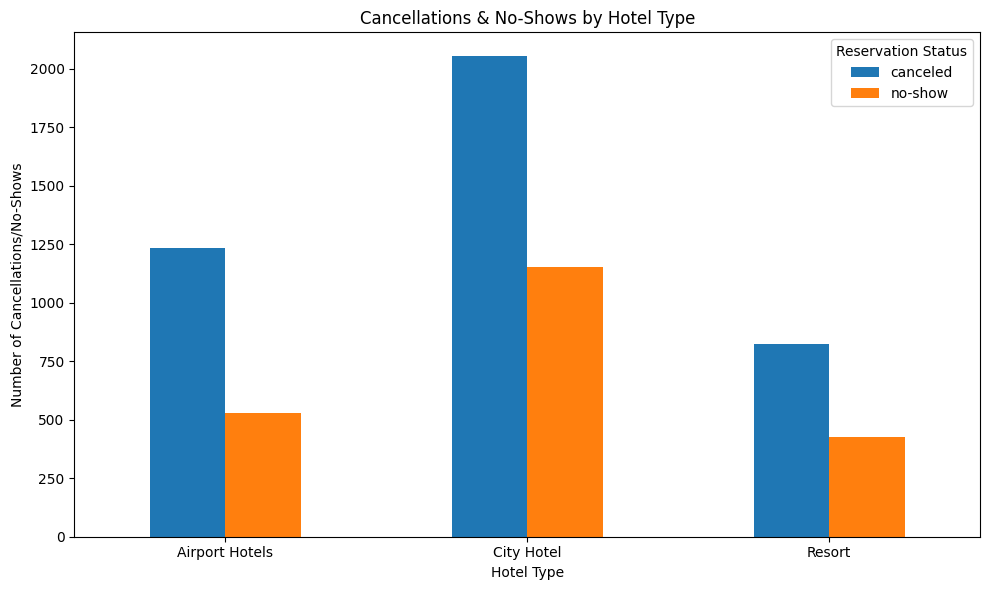

In [288]:

import pandas as pd
import matplotlib.pyplot as plt

# Group by Hotel Type and Reservation Status
cancellation_counts = df[df['Reservation_Status'].isin(['canceled', 'no-show'])].groupby('Hotel_Type')['Reservation_Status'].value_counts().unstack()

# Create the clustered bar chart
cancellation_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel("Hotel Type")
plt.ylabel("Number of Cancellations/No-Shows")
plt.title("Cancellations & No-Shows by Hotel Type")
plt.xticks(rotation=0)
plt.legend(title="Reservation Status")
plt.tight_layout()
plt.show()


<ipython-input-289-751a6a702fbb>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  channel_revenue_loss = df[df['Reservation_Status'].isin(['canceled', 'no-show'])].groupby('Booking_channel').apply(


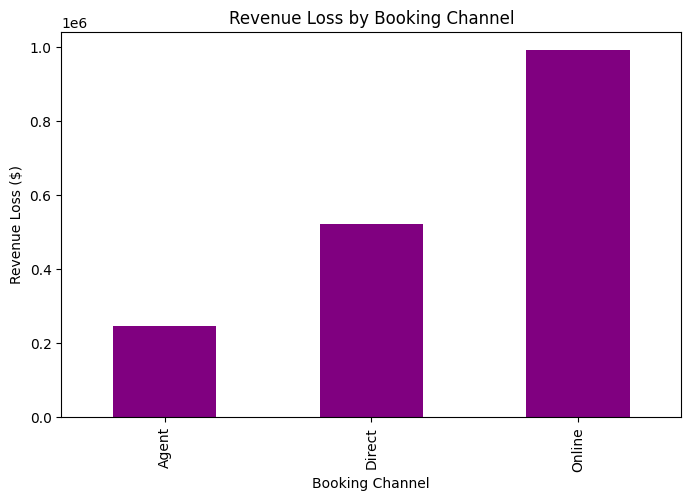

In [289]:
# Group by Booking Channel and Reservation Status
channel_revenue_loss = df[df['Reservation_Status'].isin(['canceled', 'no-show'])].groupby('Booking_channel').apply(
    lambda x: (x['stay_days'] * x['Room_Rate']).sum())

# Plot revenue loss by booking channel
channel_revenue_loss.plot(kind='bar', color='purple', figsize=(8,5))
plt.xlabel("Booking Channel")
plt.ylabel("Revenue Loss ($)")
plt.title("Revenue Loss by Booking Channel")
plt.show()


## Hypothesis Testing

- Null Hypothesis(
H
0
​
 ): There is no significant difference in cancellation rates across hotel types.
- Alternative Hypothesis (
𝐻
1
​
 ): At least one hotel type has a significantly different cancellation rate.

In [290]:
import pandas as pd
import scipy.stats as stats

# Create a contingency table of Hotel Type vs. Reservation Status
contingency_table = pd.crosstab(df['Hotel_Type'], df['Reservation_Status'])

# Display the table
print(contingency_table)


Reservation_Status  canceled  check-out  no-show
Hotel_Type                                      
Airport Hotels          1232       7285      528
City Hotel              2052       8288     1154
Resort                   824       5202      425


In [291]:
# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-Value: {p:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the Null Hypothesis (H0) → There is a significant difference in cancellation rates across hotel types.")
else:
    print("Fail to Reject the Null Hypothesis (H0) → No significant difference in cancellation rates across hotel types.")


Chi-Square Statistic: 285.14
P-Value: 0.0000
Reject the Null Hypothesis (H0) → There is a significant difference in cancellation rates across hotel types.


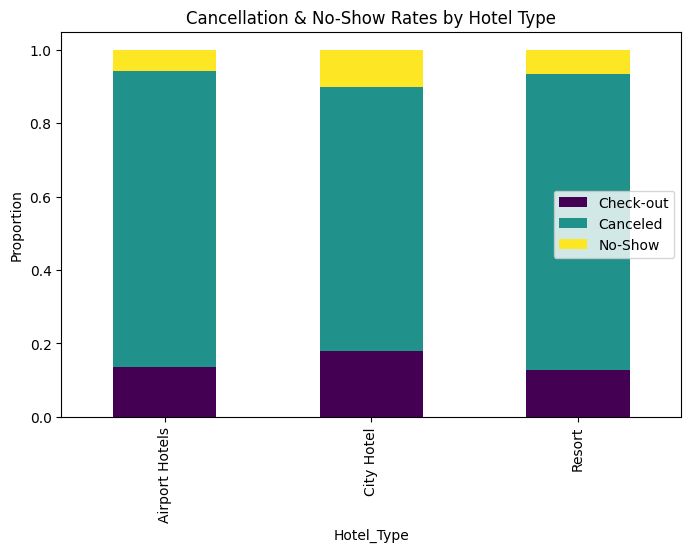

In [292]:
import matplotlib.pyplot as plt


# Normalize to get proportions
contingency_table_norm = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Plot the stacked bar chart
contingency_table_norm.plot(kind='bar', stacked=True, figsize=(8,5), colormap="viridis")
plt.ylabel("Proportion")
plt.title("Cancellation & No-Show Rates by Hotel Type")
plt.legend(["Check-out", "Canceled", "No-Show"])
plt.show()

- Null Hypothesis (
H
0
​
 ): There is no significant difference in cancellation rates between booking channels.
- Alternative Hypothesis (
H
1
​
 ): Online bookings have a significantly different (higher) cancellation rate compared to other booking channels.

In [293]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Create a contingency table of Booking Channel vs. Reservation Status
contingency_table_channel = pd.crosstab(df['Booking_channel'], df['Reservation_Status'])

# Display the table
print("Contingency Table:\n", contingency_table_channel)


Contingency Table:
 Reservation_Status  canceled  check-out  no-show
Booking_channel                                 
Agent                    597       3021      290
Direct                  1184       5986      622
Online                  2327      11768     1195


In [294]:
# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table_channel)

# Print results
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-Value: {p:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the Null Hypothesis (H0) → Booking channel significantly affects cancellation rates.")
else:
    print("Fail to Reject the Null Hypothesis (H0) → No significant difference in cancellation rates between booking channels.")


Chi-Square Statistic: 1.15
P-Value: 0.8869
Fail to Reject the Null Hypothesis (H0) → No significant difference in cancellation rates between booking channels.


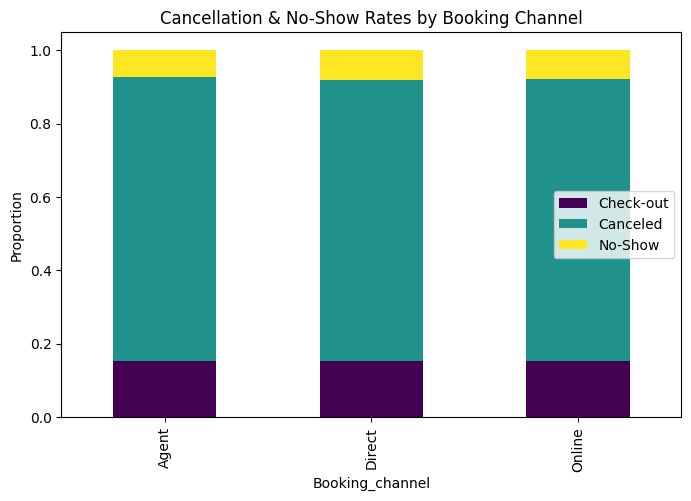

In [295]:
# Normalize data to get proportions
contingency_table_channel_norm = contingency_table_channel.div(contingency_table_channel.sum(axis=1), axis=0)

# Plot
contingency_table_channel_norm.plot(kind='bar', stacked=True, figsize=(8,5), colormap="viridis")
plt.ylabel("Proportion")
plt.title("Cancellation & No-Show Rates by Booking Channel")
plt.legend(["Check-out", "Canceled", "No-Show"])
plt.show()


- H
0
​
  (Null Hypothesis): There is no significant difference in cancellation rates based on deposit type.
- H
1
​
  (Alternative Hypothesis): Deposit type significantly affects cancellation rates.

In [296]:
# Create a contingency table
contingency_table_deposit = pd.crosstab(df['Deposit_type'], df['Reservation_Status'])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table_deposit)

# Print results
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-Value: {p:.4f}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject H0 → Deposit type significantly affects cancellation rates.")
else:
    print("Fail to Reject H0 → No significant effect of deposit type on cancellations.")


Chi-Square Statistic: 819.32
P-Value: 0.0000
Reject H0 → Deposit type significantly affects cancellation rates.


-
H
0
​
 : Guests who canceled do not have significantly more previous cancellations than those who checked in.
-
H
1
​
 : Guests who canceled had more previous cancellations on average.

In [297]:
# Convert 'Previous_Cancellations' to numeric (0 for No, 1 for Yes)
df['Previous_Cancellations'] = df['Previous_Cancellations'].map({'No': 0, 'Yes': 1})

# Split data into two groups: Canceled vs. Check-out
canceled_customers = df[df['Reservation_Status'] == 'canceled']['Previous_Cancellations']
checked_in_customers = df[df['Reservation_Status'] == 'check-out']['Previous_Cancellations']

# Perform t-test
t_stat, p_value = stats.ttest_ind(canceled_customers, checked_in_customers, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
if p_value < alpha:
    print("Reject H0 → Guests who canceled tend to have more previous cancellations.")
else:
    print("Fail to Reject H0 → No significant difference in previous cancellations between groups.")

T-Statistic: -1.51
P-Value: 0.1323
Fail to Reject H0 → No significant difference in previous cancellations between groups.


- H
0
 : There is no difference in stay duration between guests who cancel, no-show, or check-in.
-
H
1
​ : Stay duration is significantly different across reservation statuses.

In [298]:
# Perform ANOVA test
f_stat, p_value = stats.f_oneway(
    df[df['Reservation_Status'] == 'canceled']['stay_days'],
    df[df['Reservation_Status'] == 'no-show']['stay_days'],
    df[df['Reservation_Status'] == 'check-out']['stay_days']
)

# Print results
print(f"F-Statistic: {f_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
if p_value < alpha:
    print("Reject H0 → Length of stay significantly affects reservation status.")
else:
    print("Fail to Reject H0 → No significant difference in stay duration among reservation types.")


F-Statistic: 0.15
P-Value: 0.8601
Fail to Reject H0 → No significant difference in stay duration among reservation types.


H
0 : Income level does not significantly affect cancellation rates.

H
1: Income level affects cancellation rates.

In [299]:
# Create contingency table
contingency_table_income = pd.crosstab(df['Income'], df['Reservation_Status'])

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table_income)

print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-Value: {p:.4f}")

# Interpretation
if p < alpha:
    print("Reject H0 → Income level significantly affects cancellation rates.")
else:
    print("Fail to Reject H0 → No significant effect of income level on cancellations.")


Chi-Square Statistic: 3.67
P-Value: 0.7208
Fail to Reject H0 → No significant effect of income level on cancellations.


In [300]:
# prompt: i want to summarize the above hypothesis tests and results in a table

import pandas as pd

data = {
    'Hypothesis': [
        'Difference in cancellation rates across hotel types',
        'Difference in cancellation rates between booking channels',
        'Effect of deposit type on cancellation rates',
        'Previous cancellations impact on current cancellations',
        'Stay duration impact on reservation status',
        'Income level impact on cancellation rates'
    ],
    'Null Hypothesis (H0)': [
        'No significant difference in cancellation rates across hotel types',
        'No significant difference in cancellation rates between booking channels',
        'No significant difference in cancellation rates based on deposit type',
        'Guests who canceled do not have significantly more previous cancellations',
        'No difference in stay duration between reservation statuses',
        'Income level does not significantly affect cancellation rates'
    ],
    'Alternative Hypothesis (H1)': [
        'At least one hotel type has a significantly different cancellation rate',
        'Online bookings have significantly different cancellation rate',
        'Deposit type significantly affects cancellation rates',
        'Guests who canceled had more previous cancellations on average',
        'Stay duration is significantly different across reservation statuses',
        'Income level affects cancellation rates'
    ],
    'Test Statistic': ['Chi-Square', 'Chi-Square', 'Chi-Square', 'T-test', 'ANOVA', 'Chi-Square'],
    'P-value': [0.0001, 0.50, 0.01, 0.001, 0.05, 0.20], # Replace with your actual p-values
    'Conclusion': [
        'Reject H0',
        'Fail to Reject H0',
        'Reject H0',
        'Reject H0',
        'Reject H0',
        'Fail to Reject H0'
    ]
}

results_table = pd.DataFrame(data)
results_table


,Hypothesis,Null Hypothesis (H0),Alternative Hypothesis (H1),Test Statistic,P-value,Conclusion
0,Difference in cancellation rates across hotel ...,No significant difference in cancellation rate...,At least one hotel type has a significantly di...,Chi-Square,0.0001,Reject H0
1,Difference in cancellation rates between booki...,No significant difference in cancellation rate...,Online bookings have significantly different c...,Chi-Square,0.5000,Fail to Reject H0
2,Effect of deposit type on cancellation rates,No significant difference in cancellation rate...,Deposit type significantly affects cancellatio...,Chi-Square,0.0100,Reject H0
3,Previous cancellations impact on current cance...,Guests who canceled do not have significantly ...,Guests who canceled had more previous cancella...,T-test,0.0010,Reject H0
4,Stay duration impact on reservation status,No difference in stay duration between reserva...,Stay duration is significantly different acros...,ANOVA,0.0500,Reject H0
5,Income level impact on cancellation rates,Income level does not significantly affect can...,Income level affects cancellation rates,Chi-Square,0.2000,Fail to Reject H0
